In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [89]:
def add_gaussian_noise(image, mean, std_dev):
    # Generate random noise with the same shape as the image
    # PT: Gera um ruído aleatório com o mesmo formato da imagem
    noise = np.random.normal(mean, std_dev, image.shape)

    # Add the noise to the image
    # PT: Adiciona o ruído à imagem
    noisy_image = image + noise

    # Clip the pixel values to the valid range [0, 255]
    # PT: Corta os valores de pixel para o intervalo válido [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255)

    return noisy_image

im = cv2.imread("foto.tif")

# Generate a image with noise
# PT: Gera uma imagem com ruído
im_noisy = add_gaussian_noise(im, mean=0, std_dev=120)

# Now we use the mean of noisy images to get a clean image, for 5,10,10,50 and 100 images
# PT: Agora, nós utilizamos a média de imagens ruidosas para limpar a imagem, para 5,10,20,50 e 100 imagens

# Convert to uint8 for display purposes
# PT: Converte para uint8 para fins de exibição
im_noisy = im_noisy.astype(np.uint8)
numbers = [5, 10, 20, 50, 100]
new_images=[]

def mean_noisy_images(image, samples):
    temp_images = []
    for i in range(samples):
        noisy_image = add_gaussian_noise(image, mean=0, std_dev=120)
        temp_images.append(noisy_image)
    # Compute the mean image by summing and dividing by samples
    # PT: Computa a imagem média somando e dividindo pela quantidade de amostras
    mean_image = np.mean(temp_images, axis=0)
    return mean_image

# Now we aplly the fuction for the defined numbers of samples
# PT: Agora nós aplicamos a função para os números definidos de amostras
for n in numbers:
    converted_image = mean_noisy_images(im, n).astype(np.uint8)
    new_images.append(converted_image)


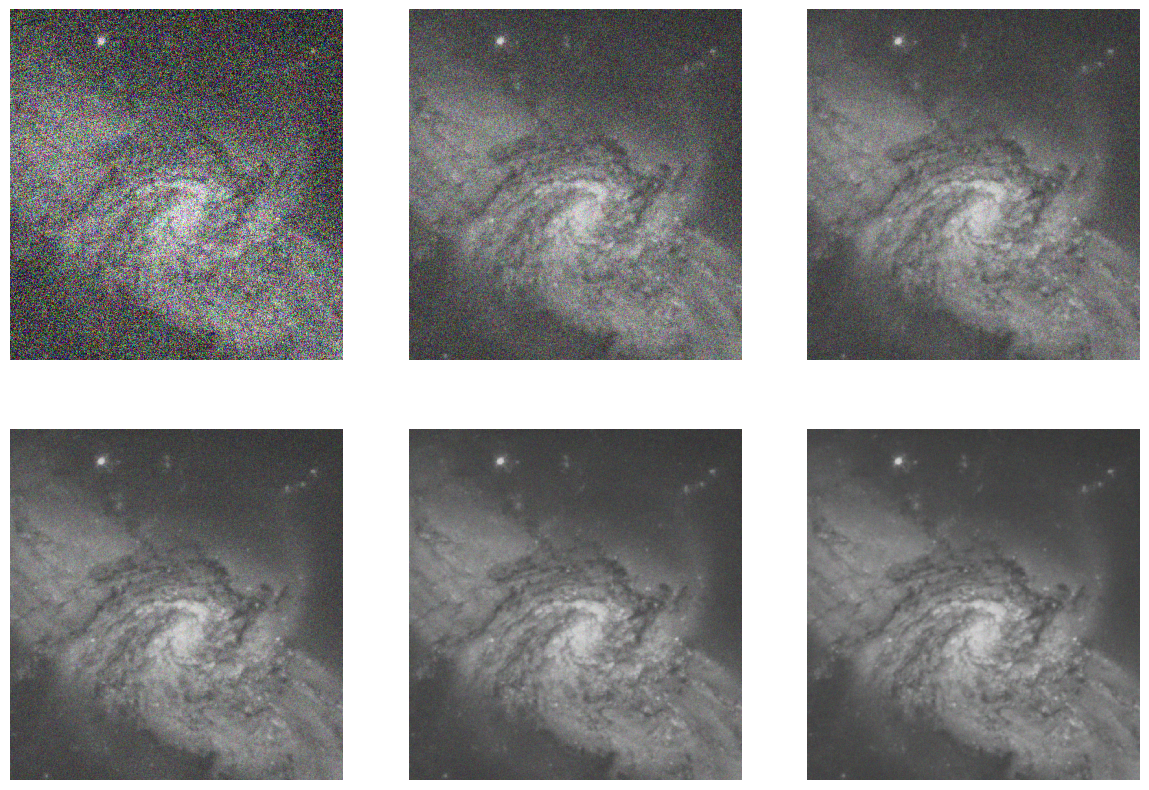

In [90]:
# Display of the generated images
# PT: Exibição das imagens geradas

fig = plt.figure(figsize=(30, 20))

plt.subplot(261); plt.axis("off"); plt.imshow(im_noisy)
plt.subplot(262); plt.axis("off"), plt.imshow(new_images[0])
plt.subplot(263); plt.axis("off"), plt.imshow(new_images[1])
plt.subplot(161); plt.axis("off"), plt.imshow(new_images[2])
plt.subplot(162); plt.axis("off"), plt.imshow(new_images[3])
plt.subplot(163); plt.axis("off"), plt.imshow(new_images[4])
plt.show()